In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# Multi-class Classification


### 0. training data

In [2]:
# contains 5000 training examples of handwritten digits
# (This is a subset of the MNIST handwritten digit dataset). 
# where each training example is a 20 pixel by 20 pixel grayscale image of the digit.
# The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
# Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X
# where every row is a training example for a handwritten digit image.

In [16]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10
#  training data stored in arrays X, y
data = loadmat(os.path.join('ex3data1.mat'))
print(data)
X = data['X']
y = data['y']
y[y == 10] = 0 # because of matfile
m = y.size
print(X.shape)
print(y.shape)
m

{'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8), 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), '__version__': '1.0', '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__globals__': []}
(5000, 400)
(5000, 1)


5000

### 1. visualize the data

[4775  213 4180 1326 4135 3744 2353 1062 2942  857 2191  727 4805 4829
 3917  246 3306 1242 4137 4130]


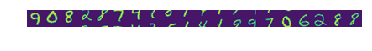

In [4]:
sample = np.random.choice(X.shape[0], 20) # randomly select some examples
pyplot.imshow(X[sample,1:].reshape(-1,20).T)
pyplot.axis('off')
print sample

### 2. vectorizing Logistic Regression


In [5]:
# You will be using multiple one-vs-all logistic regression models to build a multi-class classifier. 
# Since there are 10 classes, you will need to train 10 separate logistic regression classifiers. 
# so you should vectorize the cost function

In [6]:

def sigmoid(z):
    return(1 / (1 + np.exp(-z)))


In [17]:
import scipy
lam = 1
data_dict = scipy.io.loadmat('ex3data1.mat')
X = data_dict['X']
y = data_dict['y'].ravel()
M = X.shape[0]
N = X.shape[1]
num_labels = len(np.unique(y)) # = 10

X = np.hstack((np.ones((M, 1)), X))
sigmoid = lambda x: 1 / (1 + np.exp(-x))
theta_0 = np.zeros(N + 1)
N

400

### 3. one-vs-all classification

In [8]:

cost_history = [] # Use this array to log costs calculated in the call to scipy's "minimize" below.

def cost_function(theta, X, y, M, lam):
 
    global cost_history
    
    cost = 1 / M * (- y.dot(np.log(sigmoid(theta.dot(X.T)))) - (1 - y).dot(np.log(1 - sigmoid(theta.dot(X.T))))) \
        + lam / 2 / M * np.sum(theta[1:]**2)
    grad = 1 / M * (sigmoid(theta.dot(X.T)) - y).dot(X) + lam / M * np.hstack(([0], theta[1:]))
    
    cost_history.append(cost)
    return cost, grad

In [9]:
def oneVsAll(theta_0, X, y, M, num_labels, lam):
    """Python version of oneVsAll.m."""
    all_theta = np.zeros((num_labels, N + 1))
    for i in xrange(1, num_labels + 1): # note that 0s are labeled with a y-value of 10 in this dataset.
        y_i_hot = (y == i).astype(np.float64)
        cost_history = [] # reset cost_history for each call to cost_function (even though cost_history not used here)
        res = optimize.minimize(cost_function, theta_0, method='L-BFGS-B', args=(X, y_i_hot, M,lam), jac=True) 
        all_theta[i - 1] = res['x']
    return all_theta
 

In [10]:
cost_0, _ = cost_function(theta_0, X, y, M, lam)
print 'Cost at initial theta (zeros): %.3f' % cost_0

Cost at initial theta (zeros): 0.000


In [11]:

all_theta = oneVsAll(theta_0, X, y, M, num_labels, lam)
all_theta.shape # number of classses = 10

(10, 401)

### 4. one-vs-all prediction

In [21]:
def predict_one_vs_all(all_theta,X):
    z = np.dot(X,all_theta.T)
    prob = sigmoid(z)
    
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return (np.argmax(prob, axis=1)+1) 
 
 

In [22]:
prediction = predict_one_vs_all(all_theta,X)
prediction.shape

(5000,)

In [21]:
print('training accuracy: {}%'.format(np.mean(prediction == y.ravel())*100))


training accuracy: 10.0%


# Neural Networks

### call data

In [42]:
#training data stored in arrays X, y
data = loadmat(os.path.join('ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# get number of examples in dataset
m = y.size

# randomly permute examples, to be used for visualizing one 
# picture at a time
indices = np.random.permutation(m)

# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [43]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = len(np.unique(y))          # 10 labels, from 0 to 9

# Load the .mat file, which returns a dictionary 
weights = loadmat(os.path.join('ex3weights.mat'))
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']
m,n = X.shape
n

400

### Feedforward Propagation and Prediction

In [44]:
# 25 units in the second layer and 10 output units (corresponding to the 10 digit classes)
# (2nd hidden layer size x input size)

Theta1.shape  

(25, 401)

In [45]:

# (output layer size x 2nd hidden layer size)  
# last theta size (k, n+1)

Theta2.shape 

(10, 26)

In [46]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [70]:
def predict(Theta1,Theta2, X):
    z_2 = Theta1[:,0:n].dot(X.T)
    a_2 = sigmoid(z_2)
    a_2 = np.vstack((np.ones(m), a_2))
    z_3 = np.dot(Theta2,a_2)
    a_3 = sigmoid(z_3)
        
    return(np.argmax(a_3, axis=1)+1)
pred = predict(Theta1,Theta2, X)

In [71]:
pred

array([ 931, 1428, 1769, 2500, 2935, 3276, 3885, 4115, 4869,  203])